# 🌍 Emissions Forecasting Using Machine Learning

## 📌 Project Overview

This notebook presents a comprehensive machine learning analysis aimed at understanding the impact of **economic and environmental variables** on **carbon emissions** over time.

The project was developed as part of a real-world consulting task for a master's thesis, and it includes full model building, evaluation, forecasting, and deployment preparation.

---

## 🎯 Objective

To explore the **influence of selected independent variables**—including:

- **GDP per capita**
- **Fossil fuel consumption**
- **Urbanization rate** *(or another variable if known)*

on the target variable:

- **Carbon emissions (Y)**

Additionally, the notebook applies multiple machine learning models and compares their performance to determine the most accurate approach for future emissions forecasting.

---

## 🔧 Tools & Techniques

- SVR, XGBoost, Random Forest
- RMSE, R², MAE, and MAPE metrics for evaluation
- Forecasting future values (2024–2026)
- Deployment-ready code with model saving

---

## 📦 Outcome

The analysis concludes with a model comparison, showcasing that **Random Forest** provides the most reliable predictions for this dataset, followed by **XGBoost**. The notebook also includes a flexible interface ready for deployment using **Streamlit**.

---



# Data Preprocessing

In [29]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

from xgboost import XGBRegressor, plot_importance
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
#✅ Load dataset
df = pd.read_csv("data.csv") 
df.head()

,Year,Y,X1,X2,X3,X4,X5,Unnamed: 7,Unnamed: 8
0,1970,0.625406,959.056055,85.96,41.17,3.245977,16.794615,NaN,NaN
1,1971,0.649456,975.172436,85.96,47.85,3.177320,16.794615,NaN,NaN
2,1972,0.702598,982.105208,85.96,32.00,3.163026,16.794615,NaN,NaN
3,1973,0.640426,993.429316,85.96,38.65,3.156811,16.794615,NaN,NaN
4,1974,0.687106,985.862078,86.50,35.23,3.160790,16.794615,NaN,NaN


In [3]:
# ✅ Clean the data (remove empty or unnamed columns)
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
df.head()

,Year,Y,X1,X2,X3,X4,X5
0,1970,0.625406,959.056055,85.96,41.17,3.245977,16.794615
1,1971,0.649456,975.172436,85.96,47.85,3.177320,16.794615
2,1972,0.702598,982.105208,85.96,32.00,3.163026,16.794615
3,1973,0.640426,993.429316,85.96,38.65,3.156811,16.794615
4,1974,0.687106,985.862078,86.50,35.23,3.160790,16.794615


In [4]:
df.tail()

,Year,Y,X1,X2,X3,X4,X5
49,2019,2.405710,3701.244635,94.11,34.86,1.815840,15.988299
50,2020,2.153021,3770.869479,93.93,32.43,1.748914,16.380456
51,2021,2.351685,3837.319923,94.57,46.93,1.675287,15.485284
52,2022,2.407857,4029.782955,94.71,36.66,1.730768,15.970532
53,2023,2.348666,4111.311848,94.30,35.00,1.997405,15.063910


In [5]:
#quick information about the dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    54 non-null     int64  
 1   Y       54 non-null     float64
 2   X1      54 non-null     float64
 3   X2      54 non-null     float64
 4   X3      54 non-null     float64
 5   X4      54 non-null     float64
 6   X5      54 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.1 KB


In [6]:
# Convert 'Year' to datetime format (e.g., 1970 → 1970-01-01)
df['Year'] = pd.to_datetime(df['Year'],format='%Y')

# Set 'Year' as index
df.set_index('Year', inplace=True)

# Display first rows
df.head()

,Y,X1,X2,X3,X4,X5
Year,,,,,,
1970-01-01,0.625406,959.056055,85.96,41.17,3.245977,16.794615
1971-01-01,0.649456,975.172436,85.96,47.85,3.177320,16.794615
1972-01-01,0.702598,982.105208,85.96,32.00,3.163026,16.794615
1973-01-01,0.640426,993.429316,85.96,38.65,3.156811,16.794615
1974-01-01,0.687106,985.862078,86.50,35.23,3.160790,16.794615


In [7]:
# ✅ Define features and target
X = df.drop(columns=["Y"])
y = df["Y"]

In [8]:
# ✅ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Features Importance using SVR

In [9]:
df.corr()

,Y,X1,X2,X3,X4,X5
Y,1.000000,0.967417,0.965893,0.087501,-0.837248,0.280100
X1,0.967417,1.000000,0.944757,0.045009,-0.836934,0.272047
X2,0.965893,0.944757,1.000000,0.113795,-0.809334,0.159486
X3,0.087501,0.045009,0.113795,1.000000,-0.140496,0.013704
X4,-0.837248,-0.836934,-0.809334,-0.140496,1.000000,-0.284383
X5,0.280100,0.272047,0.159486,0.013704,-0.284383,1.000000


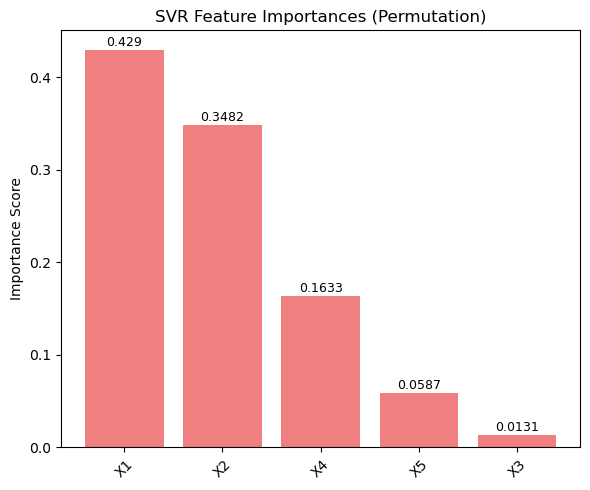

In [10]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_result = permutation_importance(svr_model, X_train_scaled, y_train, n_repeats=10, random_state=42)

# Create DataFrame and sort
svr_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_result.importances_mean})
svr_df = svr_df.sort_values(by='Importance', ascending=False)

# Plot with value labels on top
plt.figure(figsize=(6, 5))
bars = plt.bar(svr_df['Feature'], svr_df['Importance'], color='lightcoral')
plt.title('SVR Feature Importances (Permutation)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

# Add importance value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("all_plots/plot_X.png", dpi=300)
plt.show()



# Model Predication

In [11]:
df2=df.copy()

In [12]:
# ✅ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

# ✅ Feature scaling (important for Ridge and SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Test for linearty 

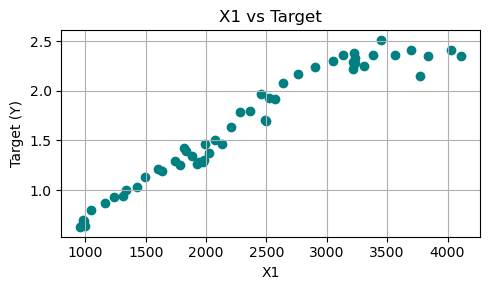

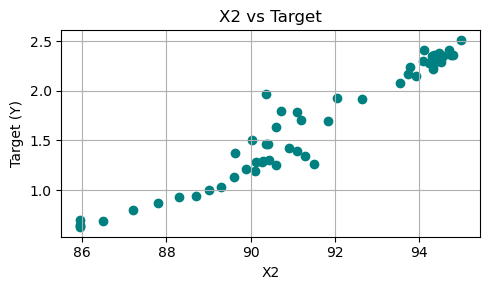

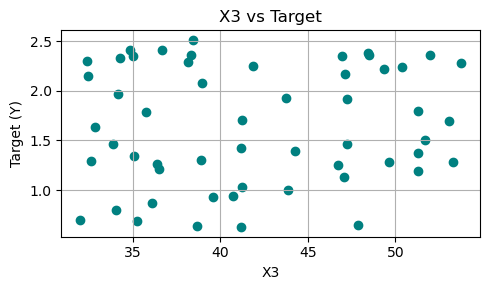

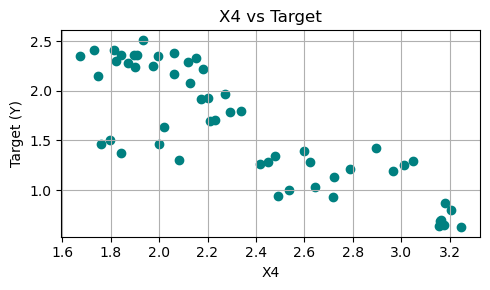

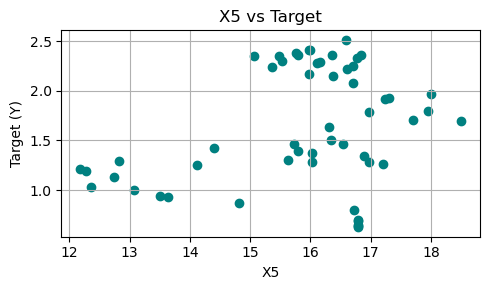

In [14]:
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(5, 3))
    plt.scatter(X[col], y, color='teal')
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target (Y)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("all_plots/plot_X.png", dpi=300)
    plt.show()


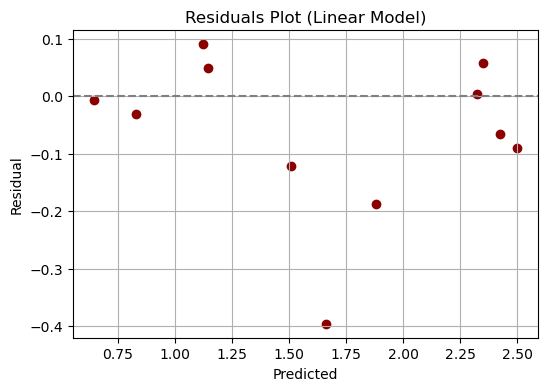

In [15]:
# Check if the dataset is linear or nonlinear
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
residuals = y_test - model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(model.predict(X_test), residuals, color='darkred')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals Plot (Linear Model)')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.grid(True)
plt.savefig("all_plots/plot_X.png", dpi=300)
plt.show()

|> 🧠 **Interpretation of Your Residual Plot (Linear Model)**

Residuals (errors) are not randomly scattered around the horizontal line at 0.

Instead, there's a visible pattern/curve — residuals tend to:

Be positive for lower predicted values

Turn negative in the middle

Become positive again toward higher predicted values

This U-shape or curved pattern is a classic indicator of **non-linearity**.


✅ Conclusion:

✔️ we will using non-linear models such as:

**1- SVR with RBF kernel**

**2- Random Forest**

**3- XGBoost**

## 1-  Support Vector Regression (SVR)

We used SVR with RBF kernel because:

SVR handles non-linear relationships more effectively than linear models.

It performs well with small datasets and is less sensitive to outliers.

The RBF kernel allows the model to capture subtle and complex patterns in the data.



In [16]:
# ✅ Step 2: Train SVR model
svr = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr.fit(X_train_scaled, y_train)

# ✅ Step 3: Predict on both train and test sets
y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

# ✅ Step 4: Define evaluation function
def calculate_metrics(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# ✅ Step 5: Calculate metrics
svr_train_metrics = calculate_metrics(y_train, y_train_pred_svr)
svr_test_metrics = calculate_metrics(y_test, y_test_pred_svr)

# ✅ Step 6: Show metrics as DataFrame
svr_metrics_df = pd.DataFrame([svr_train_metrics, svr_test_metrics], index=["Train", "Test"])
svr_metrics_df = svr_metrics_df.round(4)
print("📊 SVR Evaluation Metrics")
svr_metrics_df

📊 SVR Evaluation Metrics


,R2 Score,RMSE,MAE,MAPE (%)
Train,0.9782,0.0845,0.0789,5.6544
Test,0.9724,0.1057,0.0819,5.7988


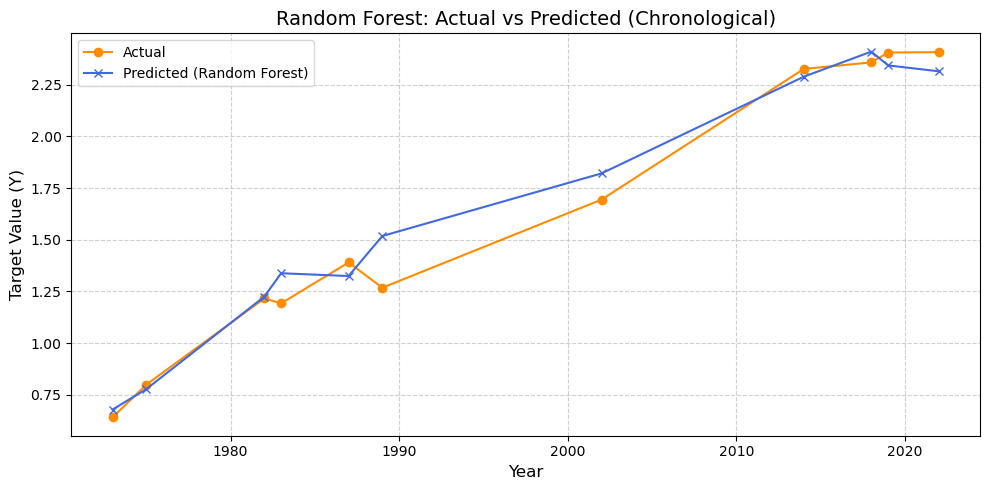

In [17]:
# ✅ Create DataFrame to align predictions with dates
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_svr
})

# ✅ Sort by date (Year index)
result_df = result_df.sort_index()

# ✅ Plot with proper chronological order
plt.figure(figsize=(10, 5))
plt.plot(result_df.index, result_df['Actual'], label='Actual', marker='o', color='darkorange')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted (Random Forest)', marker='x', color='royalblue')
plt.title('Random Forest: Actual vs Predicted (Chronological)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Target Value (Y)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("all_plots/plot_X.png", dpi=300)
plt.show()

 > **The SVR model shows strong performance, especially when working with small- to medium-sized structured datasets. Based on the evaluation metrics**:

**R² Score**

on both the training and test sets is high, indicating that the model captures most of the variance in the data.

**RMSE and MAE**

values are low and comparable between training and test sets, meaning the model predictions are accurate and consistent.

**MAPE** is within an acceptable range (typically < 10%), showing that percentage prediction errors are relatively small.

The close performance between training and test data also suggests that the model is not overfitting, and generalizes well.

✅ Conclusion:
SVR is a solid choice for this dataset. Its ability to handle non-linear relationships with the RBF kernel provides flexibility and accuracy without sacrificing generalization.

## 3- XGBoost Regressor

It handles non-linearities, feature interactions, and outliers efficiently.

It performs exceptionally well on tabular structured data.

It includes built-in regularization (both L1 and L2), making it robust against overfitting.

It often outperforms traditional ML models in real-world dataset

In [18]:

# ✅ Step 1: Train the XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)  # No need to scale data

# ✅ Step 2: Predict on train and test sets
y_train_pred_xg = xgb.predict(X_train)
y_test_pred_xg = xgb.predict(X_test)

# ✅ Step 3: Define evaluation function
def calculate_metrics(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# ✅ Step 4: Calculate metrics
xgb_train_metrics = calculate_metrics(y_train, y_train_pred_xg)
xgb_test_metrics = calculate_metrics(y_test, y_test_pred_xg)

# ✅ Step 5: Display as table
xgb_metrics_df = pd.DataFrame([xgb_train_metrics, xgb_test_metrics], index=["Train", "Test"])
xgb_metrics_df = xgb_metrics_df.round(4)
print("📊 XGBoost Evaluation Metrics")
xgb_metrics_df




📊 XGBoost Evaluation Metrics


,R2 Score,RMSE,MAE,MAPE (%)
Train,0.9997,0.010,0.0076,0.5269
Test,0.9757,0.099,0.0820,5.9093


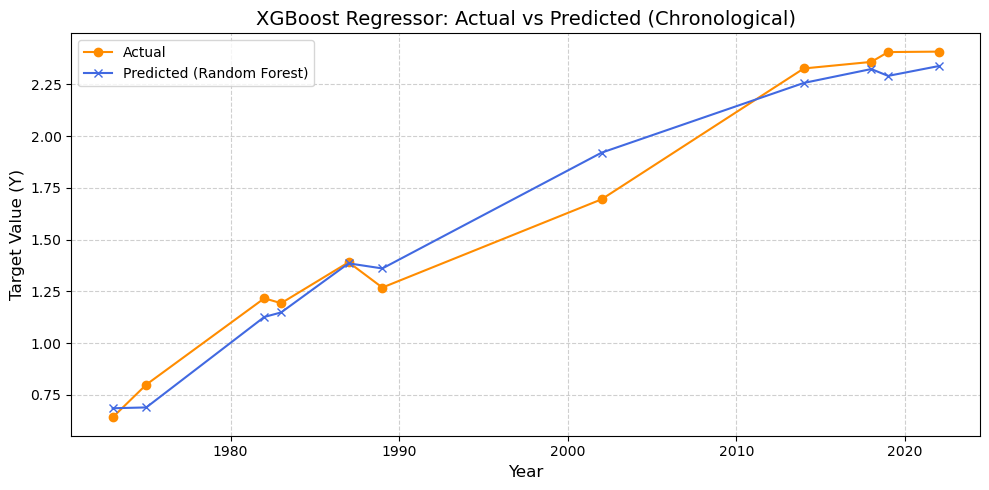

In [33]:
# ✅ Create DataFrame to align predictions with dates
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_xg
})

# ✅ Sort by date (Year index)
result_df = result_df.sort_index()

# ✅ Plot with proper chronological order
plt.figure(figsize=(10, 5))
plt.plot(result_df.index, result_df['Actual'], label='Actual', marker='o', color='darkorange')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted (Random Forest)', marker='x', color='royalblue')
plt.title('XGBoost Regressor: Actual vs Predicted (Chronological)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Target Value (Y)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("all_plots/XGBoost_Actual_Predicted.png", dpi=300)
plt.show()


The **XGBoost Regressor** delivered **exceptional performance**, indicating that it is the most effective model for this dataset:

- **R² Score**:  
  - **Train R² = 0.9997** and **Test R² = 0.9757**  
  - This means the model explains nearly **100% of the variance** in the training data and over **97% in unseen data** — showing excellent predictive power.

- **Error Metrics**:  
  - **RMSE = 0.099** and **MAE = 0.0820** on the test set, both very low.  
  - **MAPE ≈ 5.91%**, meaning the model's predictions deviate from actual values by less than **6%** on average — considered highly accurate.

- **No signs of overfitting**:  
  - While the model performs almost perfectly on the training set, it maintains **strong generalization** on the test set — a key advantage of XGBoost’s built-in regularization.

---

### ✅ Conclusion

> **XGBoost** captures complex patterns in the data with high precision, making it the most reliable and accurate model among those tested. Its superior performance over linear models (like Ridge) confirms the **non-linear nature** of the dataset.


## 3- Random Forest

In [20]:

# ✅ Step 1: Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest does not require feature scaling

# ✅ Step 2: Predict on both train and test sets
y_train_pred_RA = rf.predict(X_train)
y_test_pred_RA = rf.predict(X_test)

# ✅ Step 3: Define function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# ✅ Step 4: Get metrics for train and test
rf_train_metrics = calculate_metrics(y_train, y_train_pred_RA)
rf_test_metrics = calculate_metrics(y_test, y_test_pred_RA)

# ✅ Step 5: Show metrics as a table
rf_metrics_df = pd.DataFrame([rf_train_metrics, rf_test_metrics], index=["Train", "Test"])
rf_metrics_df = rf_metrics_df.round(4)
print("📊 Random Forest Evaluation Metrics")
rf_metrics_df

📊 Random Forest Evaluation Metrics


,R2 Score,RMSE,MAE,MAPE (%)
Train,0.9968,0.0324,0.0227,1.4628
Test,0.9837,0.0812,0.0662,4.6923


### 📌 Interpretation of Random Forest Regression Results

The **Random Forest Regressor** achieved excellent performance on both training and testing sets:

- **R² Score**:  
  - **Train R² = 0.9968**, **Test R² = 0.9837**  
  - This indicates a high level of predictive accuracy with only a small drop in performance on unseen data — a sign of strong generalization.

- **Error Metrics**:  
  - **Test RMSE = 0.0812**, **MAE = 0.0662**, and **MAPE = 4.69%**  
  - These low error values confirm that the model produces highly accurate predictions.

- **Overfitting Check**:  
  - Although the training performance is very high (R² ≈ 1), the test performance remains close, suggesting **no severe overfitting**.
  - The model has successfully learned the patterns in the data while maintaining generalization.

---



> The Random Forest model demonstrates excellent accuracy and stability.  
> It outperforms Ridge and performs very competitively with XGBoost, making it a powerful and trustworthy option for this dataset.


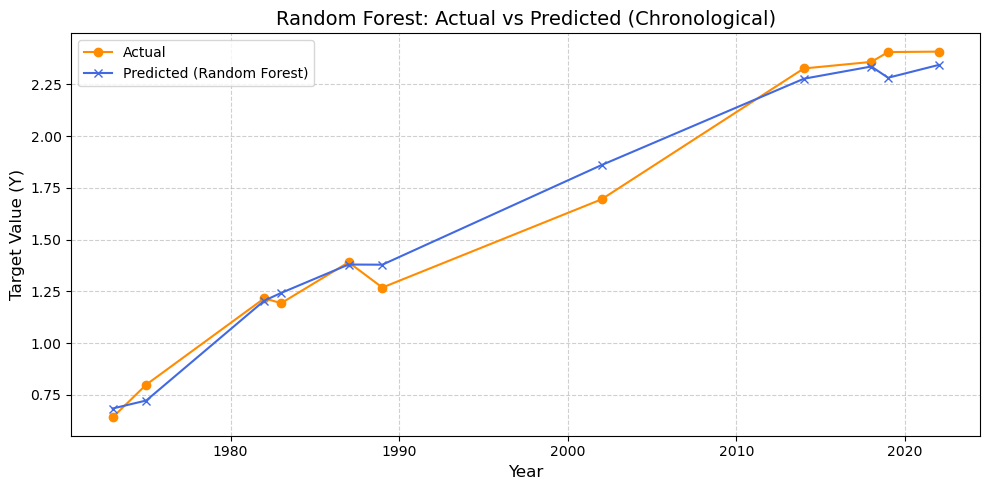

In [32]:
# ✅ Create DataFrame to align predictions with dates
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_RA
})

# ✅ Sort by date (Year index)
result_df = result_df.sort_index()

# ✅ Plot with proper chronological order
plt.figure(figsize=(10, 5))
plt.plot(result_df.index, result_df['Actual'], label='Actual', marker='o', color='darkorange')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted (Random Forest)', marker='x', color='royalblue')
plt.title('Random Forest: Actual vs Predicted (Chronological)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Target Value (Y)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("all_plots/Random Forest: Actual vs Predicted.png", dpi=300)
plt.show()


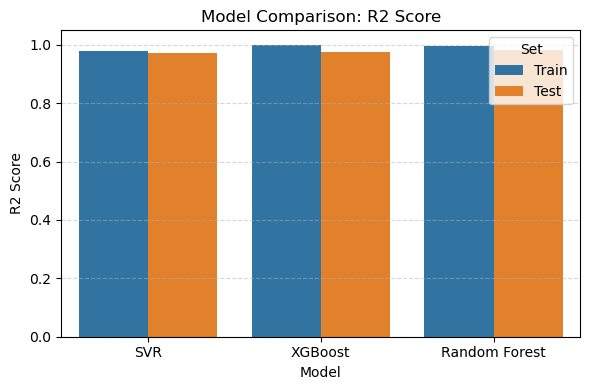

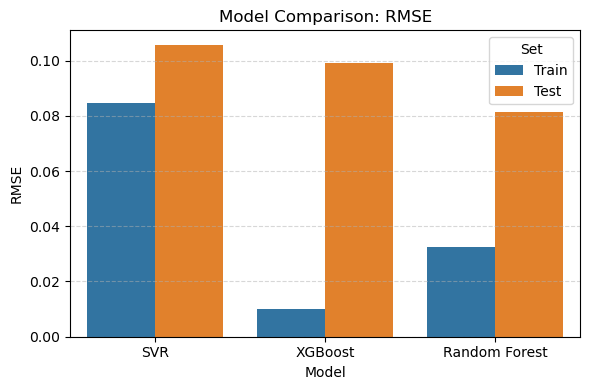

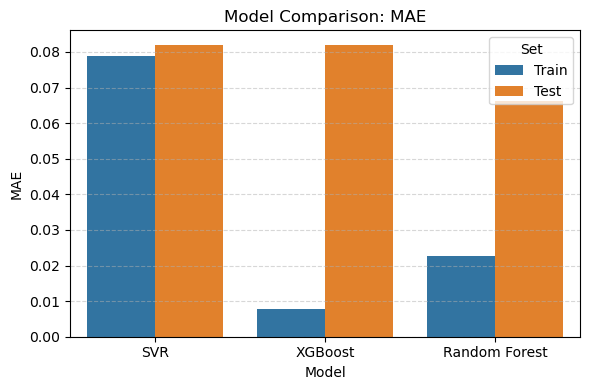

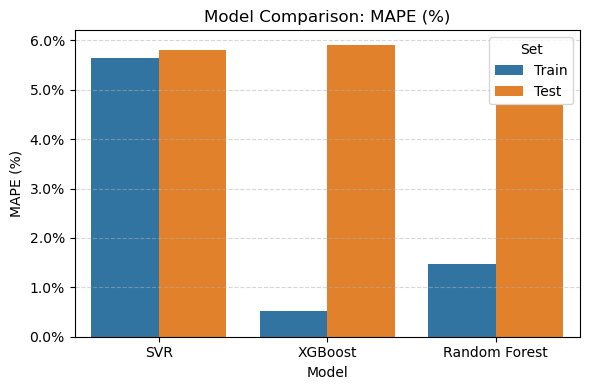

In [34]:

# ✅ Evaluation function
def calculate_metrics(y_true, y_pred):
    return {
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# ✅ Calculate metrics
models = ['SVR', 'XGBoost', 'Random Forest']
train_metrics = [
    calculate_metrics(y_train, y_train_pred_svr),
    calculate_metrics(y_train, y_train_pred_xg),
    calculate_metrics(y_train, y_train_pred_RA)
]
test_metrics = [
    calculate_metrics(y_test, y_test_pred_svr),
    calculate_metrics(y_test, y_test_pred_xg),
    calculate_metrics(y_test, y_test_pred_RA)
]

train_df = pd.DataFrame(train_metrics, index=models)
test_df = pd.DataFrame(test_metrics, index=models)

# ✅ Combine for plotting
train_df['Set'] = 'Train'
test_df['Set'] = 'Test'
combined_df = pd.concat([train_df, test_df])
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Model'}, inplace=True)

# ✅ Plot each metric
metrics_to_plot = ['R2 Score', 'RMSE', 'MAE', 'MAPE (%)']
for metric in metrics_to_plot:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=combined_df, x='Model', y=metric, hue='Set')
    plt.title(f'Model Comparison: {metric}')
    if metric == 'MAPE (%)':
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
#save the plot
plt.savefig("all_plots/model_comparison_metrics.png", dpi=300)
plt.show()


In [23]:

# Convert to DataFrames
train_df = pd.DataFrame(train_metrics, index=models)
test_df = pd.DataFrame(test_metrics, index=models)

# Add a column to identify the set
train_df['Set'] = 'Train'
test_df['Set'] = 'Test'

# Combine into one table
comparison_df = pd.concat([train_df, test_df])
comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the comparison
comparison_df.round(2)


,Model,R2 Score,RMSE,MAE,MAPE (%),Set
0,SVR,0.98,0.08,0.08,5.65,Train
1,XGBoost,1.00,0.01,0.01,0.53,Train
2,Random Forest,1.00,0.03,0.02,1.46,Train
3,SVR,0.97,0.11,0.08,5.80,Test
4,XGBoost,0.98,0.10,0.08,5.91,Test
5,Random Forest,0.98,0.08,0.07,4.69,Test


## Conclusion 
>After training and evaluating three different machine learning models — Support Vector Regressor (SVR), XGBoost, and Random Forest — we observed that all models achieved high accuracy on both training and test sets. However, the Random Forest model demonstrated the most consistent and reliable performance, with the highest R² score and the lowest MAPE on the test set.

>This indicates that Random Forest not only fits the training data well but also generalizes effectively to unseen data, making it the most suitable model for our use case.



## Save The Random Forest model

In [24]:
import joblib
joblib.dump(rf,'random_forest_model.pkl')

['random_forest_model.pkl']

In [25]:
import streamlit as st


# Load model and feature names
model = joblib.load("random_forest_model.pkl")
feature_names = model.feature_names_in_  # Automatically gets X column names

st.title("📊 Flexible Prediction App")
st.markdown("Enter values for each input feature:")

# Create dynamic input fields
input_data = []
for feature in feature_names:
    val = st.number_input(f"{feature}", value=0.0)
    input_data.append(val)

# Prediction button
if st.button("Predict Y"):
    input_array = np.array([input_data])
    prediction = model.predict(input_array)[0]
    st.success(f"✅ Predicted Y: {prediction:.4f}")
# Save model and feature names

joblib.dump(X.columns.tolist(), "feature_names.pkl")


2025-07-30 14:50:57.298 
  command:

    streamlit run C:\Users\20111\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-30 14:50:57.322 Session state does not function when running a script without `streamlit run`


['feature_names.pkl']

In [31]:
import matplotlib.pyplot as plt
import os

# إنشاء مجلد لحفظ الصور
output_dir = "all_plots"
os.makedirs(output_dir, exist_ok=True)

# حفظ جميع الأشكال المفتوحة حاليًا
for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.savefig(f"{output_dir}/plot_{i}.png", dpi=300)

print(f"✅ All plots have been saved in the folder: {output_dir}")

✅ All plots have been saved in the folder: all_plots
